In [1]:
# Importing the libraries to read, Manipulate and visualising the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Printing the datatype of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# Dropping the columns instant, workingday & dteday as it is of no importance
df.drop(['instant','dteday','workingday'],axis=1,inplace=True)

In [5]:
# Printing the unique values for each features in dataset
for column in df.columns:
    print(column+':')
    print(df[column].unique())
    print('-----------------------')

season:
[1 2 3 4]
-----------------------
yr:
[0 1]
-----------------------
mnth:
[ 1  2  3  4  5  6  7  8  9 10 11 12]
-----------------------
holiday:
[0 1]
-----------------------
weekday:
[1 2 3 4 5 6 0]
-----------------------
weathersit:
[2 1 3]
-----------------------
temp:
[14.110847  14.902598   8.050924   8.2        9.305237   8.378268
  8.057402   6.765      5.671653   6.184153   6.932731   7.081807
  6.59567    9.566653   9.498347   7.209153   8.883347  11.979134
 10.728347   7.2775     2.4243464  3.9573897  3.9930433  9.162598
  8.9175     7.995      8.342598   8.877402   7.414153   7.879134
 10.66       7.665237   8.663464  11.719153  11.138347   9.054153
  5.526103   5.918268   7.752731   9.1225    12.977402  17.015
 10.909567  13.048701  17.869153  21.388347  16.365847  11.693897
 12.436653   7.471102   9.091299  12.121732  14.938268  11.5825
 14.082598  16.698193  10.933347  13.735      8.131653  15.750847
 15.437402  10.731299  11.9925    12.129153  15.952731  13.4958

In [6]:
# Formatting the feature of season, weather & month for computation purpose
df['season'] = df['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
df['weathersit'] = df['weathersit'].map({1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain'})
df['mnth'] = df['mnth'].astype('object')
df['weekday'] = df['weekday'].astype('object')

In [7]:
# Printing the top 5 rows in the data set
df.head()

,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,1,0,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,1,0,2,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,1,0,3,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,1,0,4,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,1,0,5,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Printing the total no. of users for each category of users
users = ['casual','registered','cnt']

for user in users[:-1]:
    print(user,round(df[user].sum() / df['cnt'].sum(),2)*100,'%')

casual 19.0 %
registered 81.0 %


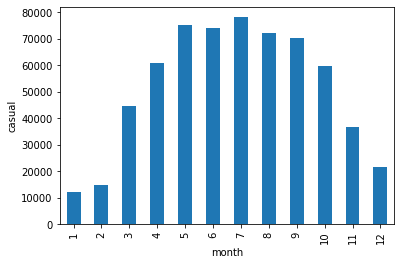

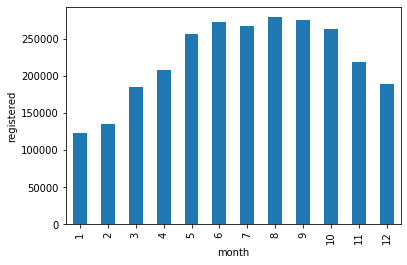

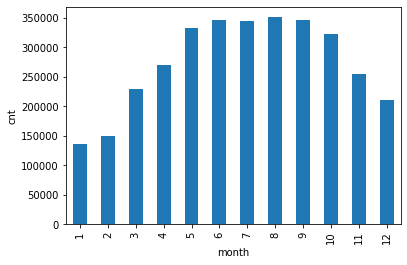

In [9]:
# Understanding the Distribution between month and (casual, Registered & total no. of users(cnt))
users = ['casual','registered','cnt']

for user in users:
    df.groupby(by='mnth')[user].sum().plot(kind='bar')
    plt.xlabel('month')
    plt.ylabel(user)
    plt.show()

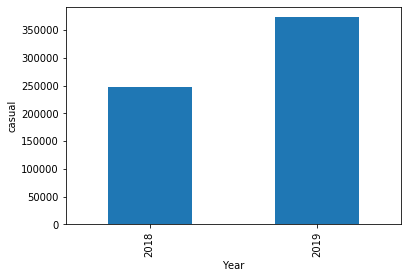

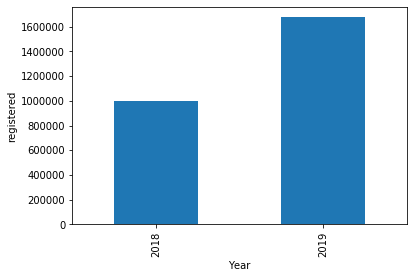

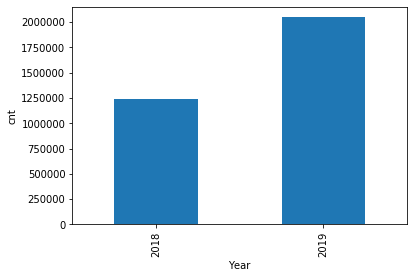

In [10]:
# Understanding the Distribution between year and (casual, Registered & total no. of users(cnt))
users = ['casual','registered','cnt']

for user in users:
    df.groupby(by='yr')[user].sum().plot(kind='bar')
    plt.xlabel('Year')
    plt.xticks([0,1],[2018,2019])
    plt.ylabel(user)
    plt.show()

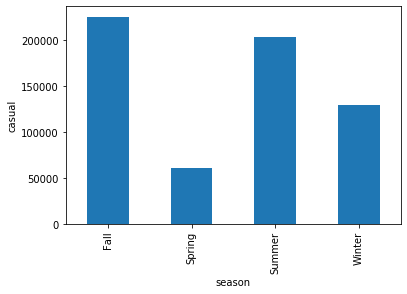

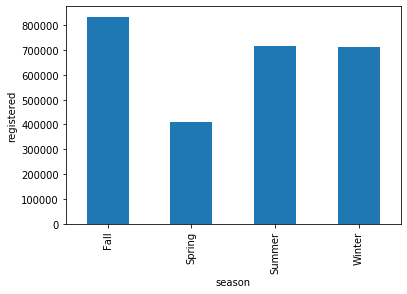

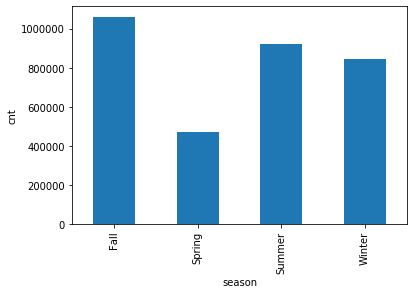

In [11]:
# Understanding the Distribution between season and (casual, Registered & total no. of users(cnt))
users = ['casual','registered','cnt']

for user in users:
    df.groupby(by='season')[user].sum().plot(kind='bar')
    plt.xlabel('season')
    plt.ylabel(user)
    plt.show()

##### From the above graph it is clear that, the user count is maximum during the Fall season

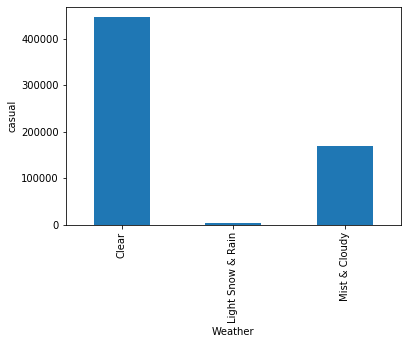

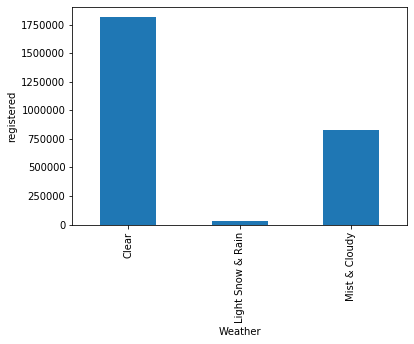

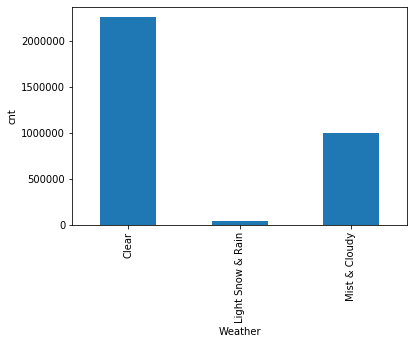

In [12]:
# Understanding the Distribution between weathersit and (casual, Registered & total no. of users(cnt))
users = ['casual','registered','cnt']

for user in users:
    df.groupby(by='weathersit')[user].sum().plot(kind='bar')
    plt.xlabel('Weather')
    plt.ylabel(user)
    plt.show()

##### From the above graph it is clear that, the user count is maximum when the weather is clear

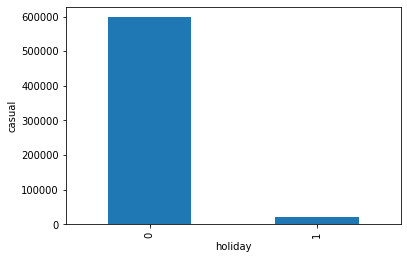

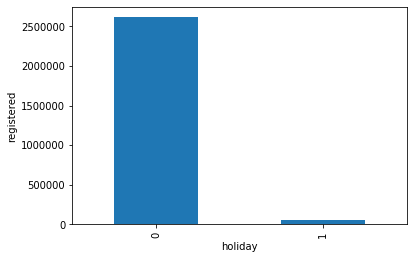

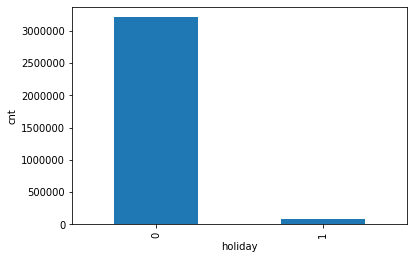

In [13]:
# Understanding the Distribution between Holiday and Type of users(casual, Registered & total no. of users(cnt))
users = ['casual','registered','cnt']

for user in users:
    df.groupby(by='holiday')[user].sum().plot(kind='bar')
    plt.xticks([0,1])
    plt.ylabel(user)
    plt.show()

##### From the above graph it is clear that, the user count is maximum when the day is not  a holiday

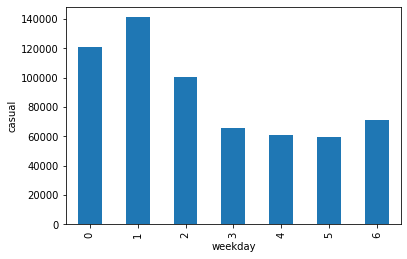

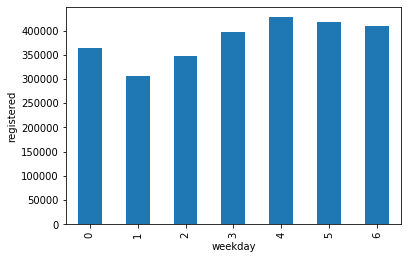

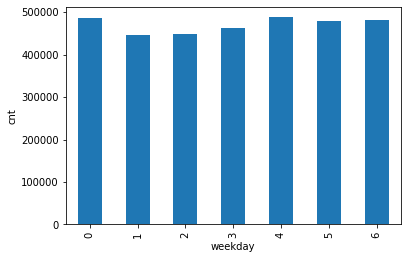

In [14]:
# Understanding the Distribution between Weekday and type of users(casual, Registered & total no. of users(cnt))
users = ['casual','registered','cnt']

for user in users:
    df.groupby(by='weekday')[user].sum().plot(kind='bar')
    plt.ylabel(user)
    plt.show()

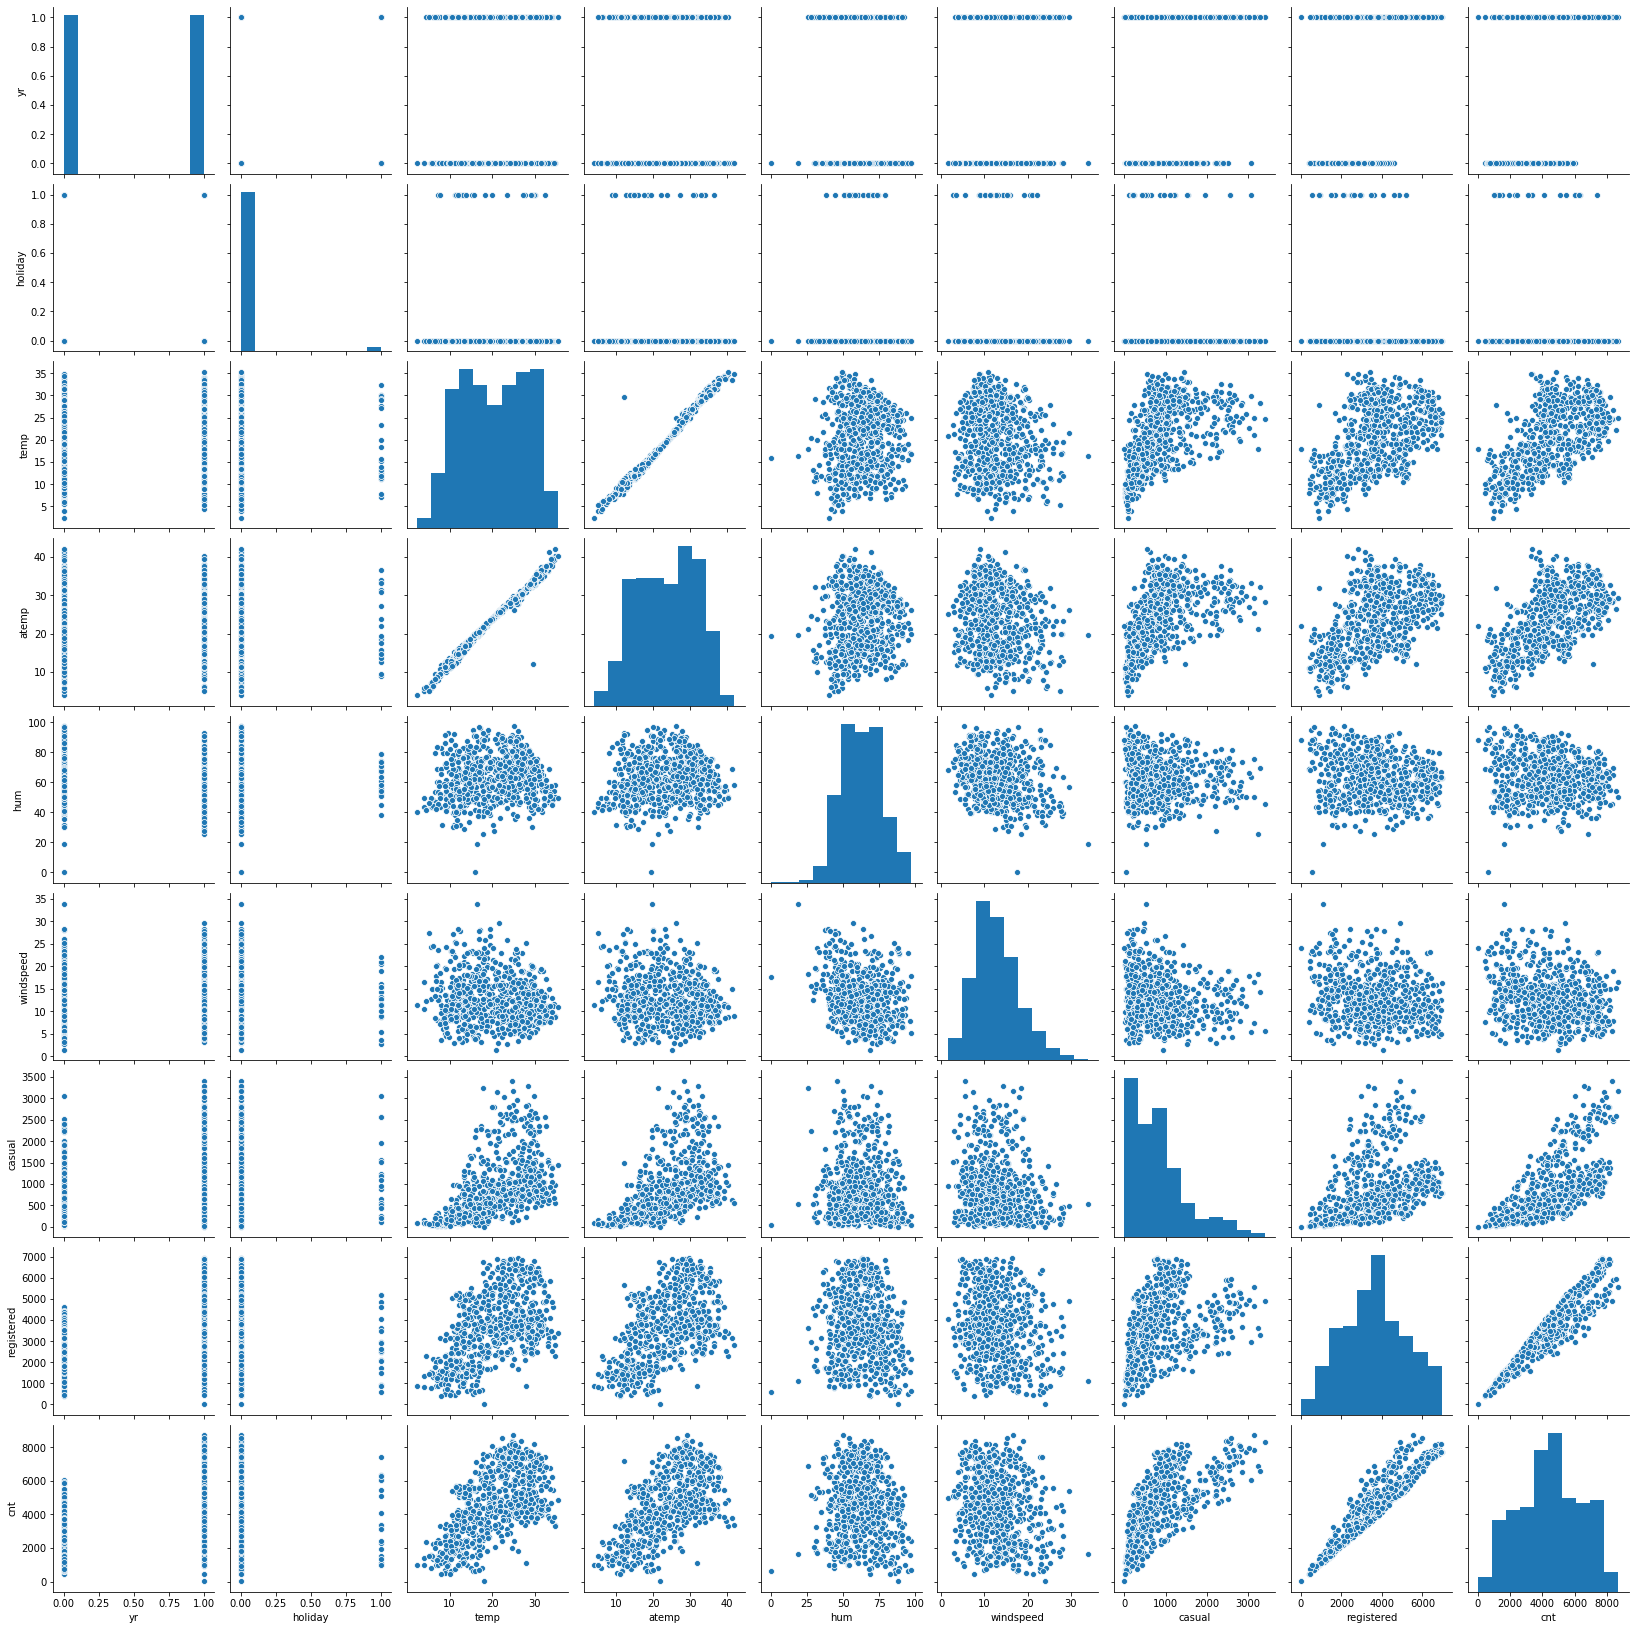

In [15]:
# Printing the Pairplot for the dataset
numerical_column = [feature for feature in df.columns if df[feature].dtype == 'int64' or df[feature].dtype == 'float64']
sns.pairplot(df[numerical_column])
plt.show()

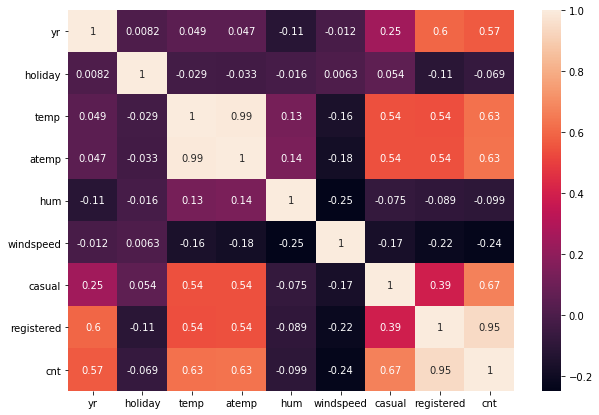

In [16]:
# Finding the correlation between the features
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [17]:
# Replacing the temp, atemp feature with the avg_temp(by taking the average between them)
df['avgtemp'] = df['temp']+df['atemp']
df.drop(['temp','atemp'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,weathersit,hum,windspeed,casual,registered,cnt,avgtemp
0,Spring,0,1,0,1,Mist & Cloudy,80.5833,10.749882,331,654,985,32.292097
1,Spring,0,1,0,2,Mist & Cloudy,69.6087,16.652113,131,670,801,32.589548
2,Spring,0,1,0,3,Clear,43.7273,16.636703,120,1229,1349,17.521174
3,Spring,0,1,0,4,Clear,59.0435,10.739832,108,1454,1562,18.806100
4,Spring,0,1,0,5,Clear,43.6957,12.522300,82,1518,1600,20.768737


In [18]:
# Printing the info for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   weathersit  730 non-null    object 
 6   hum         730 non-null    float64
 7   windspeed   730 non-null    float64
 8   casual      730 non-null    int64  
 9   registered  730 non-null    int64  
 10  cnt         730 non-null    int64  
 11  avgtemp     730 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 68.6+ KB


In [19]:
# Dropping the features mnth(month), weekday, casual & registered
df.drop(['mnth','weekday','casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,holiday,weathersit,hum,windspeed,cnt,avgtemp
0,Spring,0,0,Mist & Cloudy,80.5833,10.749882,985,32.292097
1,Spring,0,0,Mist & Cloudy,69.6087,16.652113,801,32.589548
2,Spring,0,0,Clear,43.7273,16.636703,1349,17.521174
3,Spring,0,0,Clear,59.0435,10.739832,1562,18.806100
4,Spring,0,0,Clear,43.6957,12.522300,1600,20.768737


In [20]:
# Creating Dummy variables for the season and weathersit features
season = pd.get_dummies(df['season'],drop_first=True)
weather = pd.get_dummies(df['weathersit'],drop_first=True)

In [21]:
# Joining the above created feature with the original dataset
df = pd.concat([df,season,weather],axis=1)
df.drop(['season','weathersit'],axis=1,inplace=True)
df.head()

,yr,holiday,hum,windspeed,cnt,avgtemp,Spring,Summer,Winter,Light Snow & Rain,Mist & Cloudy
0,0,0,80.5833,10.749882,985,32.292097,1,0,0,0,1
1,0,0,69.6087,16.652113,801,32.589548,1,0,0,0,1
2,0,0,43.7273,16.636703,1349,17.521174,1,0,0,0,0
3,0,0,59.0435,10.739832,1562,18.806100,1,0,0,0,0
4,0,0,43.6957,12.522300,1600,20.768737,1,0,0,0,0


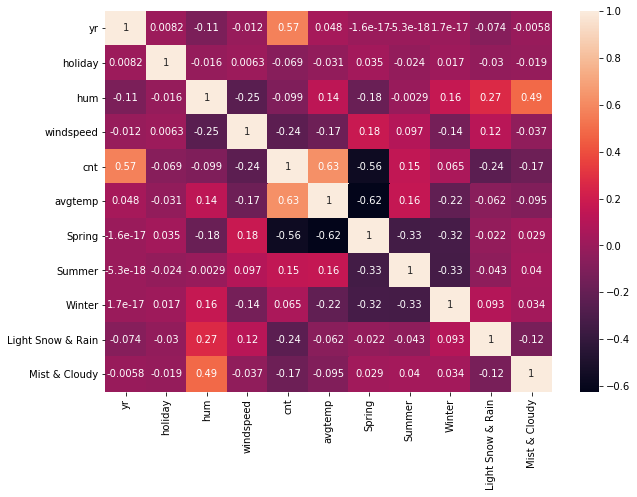

In [22]:
# Finding the correlation between the features
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [23]:
# Splitting into dependent(y) and independent feature(X)
y = df[['cnt']]
X = df.drop('cnt',axis=1)

In [24]:
# Splitting into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8,random_state=0)

In [25]:
# Applying the feature scaling for training dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_feature = ['hum','windspeed','avgtemp']
X_train[X_feature] = scaler.fit_transform(X_train[X_feature])
y_train = scaler.fit_transform(y_train)

In [26]:
# Importing linear model library
import statsmodels.api as sm

In [27]:
# Fitting the model
X_train = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train)
lr_model = lr.fit()

In [28]:
# Printing the parameters
lr_model.params

const                0.180966
yr                   0.277216
holiday             -0.015415
hum                 -0.046629
windspeed           -0.042542
avgtemp              0.450058
Spring              -0.150056
Summer               0.008974
Winter               0.051435
Light Snow & Rain   -0.206979
Mist & Cloudy       -0.079920
dtype: float64

In [29]:
# Printing the stats for the training model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     70.77
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           1.04e-48
Time:                        11:18:03   Log-Likelihood:                 133.20
No. Observations:                 146   AIC:                            -244.4
Df Residuals:                     135   BIC:                            -211.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1810      0.054      3.349      0.001       0.074       0.288
yr                    0.2772      0.017     16.048      0.000       0.243       0.311
holiday              -0.0154      0.046     -0.334      0.739      -0.107       0.076
hum                  -0.0466      0.055     -0.852      0.396      -0.155       0.062
windspeed            -0.0425      0.046     -0.919      0.360      -0.134       0.049
avgtemp               0.4501      0.059      7.620      0.000       0.333       0.567
Spring               -0.1501      0.039     -3.799      0.000      -0.228      -0.072
Summer                0.0090      0.028      0.316      0.753      -0.047       0.065
Winter                0.0514      0.032      1.591      0.114      -0.013       0.115
Light Snow & Rain    -0.2070      0.058     -3.573      0.000      -0.322      -0.092
Mist & Cloudy        -0.0799      0.022     -3.569      0.000      -0.124      -0.036
==============================================================================
Omnibus:                        5.487   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.665
Skew:                          -0.303   Prob(JB):                       0.0589
Kurtosis:                       3.751   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Priting the VIF value
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['Factor'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['Factor'] = round(vif['Factor'],2)
vif = vif.sort_values(by='Factor',ascending=False)
vif

,Feature,Factor
0,const,41.74
6,Spring,3.90
5,avgtemp,3.08
8,Winter,2.88
7,Summer,2.11
3,hum,1.77
10,Mist & Cloudy,1.49
9,Light Snow & Rain,1.28
4,windspeed,1.10
1,yr,1.06


In [31]:
# Fitting the model by removing Summer feature
X_train = X_train.drop('Summer',axis=1)
X_train = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     79.15
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           1.19e-49
Time:                        11:18:04   Log-Likelihood:                 133.15
No. Observations:                 146   AIC:                            -246.3
Df Residuals:                     136   BIC:                            -216.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1902      0.045      4.194      0.000       0.101       0.280
yr                    0.2769      0.017     16.108      0.000       0.243       0.311
holiday              -0.0157      0.046     -0.342      0.733      -0.107       0.075
hum                  -0.0436      0.054     -0.812      0.418      -0.150       0.063
windspeed            -0.0407      0.046     -0.890      0.375      -0.131       0.050
avgtemp               0.4401      0.050      8.858      0.000       0.342       0.538
Spring               -0.1583      0.029     -5.383      0.000      -0.217      -0.100
Winter                0.0448      0.025      1.827      0.070      -0.004       0.093
Light Snow & Rain    -0.2088      0.057     -3.636      0.000      -0.322      -0.095
Mist & Cloudy        -0.0805      0.022     -3.619      0.000      -0.124      -0.037
==============================================================================
Omnibus:                        5.643   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.802
Skew:                          -0.315   Prob(JB):                       0.0550
Kurtosis:                       3.746   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Priting the VIF value
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['Factor'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['Factor'] = round(vif['Factor'],2)
vif = vif.sort_values(by='Factor',ascending=False)
vif

,Feature,Factor
0,const,29.59
5,avgtemp,2.19
6,Spring,2.18
3,hum,1.72
7,Winter,1.67
9,Mist & Cloudy,1.48
8,Light Snow & Rain,1.26
4,windspeed,1.08
1,yr,1.06
2,holiday,1.01


In [33]:
# Fitting the model by removing holiday feature
X_train = X_train.drop('holiday',axis=1)
X_train = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     89.60
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           1.28e-50
Time:                        11:18:04   Log-Likelihood:                 133.08
No. Observations:                 146   AIC:                            -248.2
Df Residuals:                     137   BIC:                            -221.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1901      0.045      4.207      0.000       0.101       0.280
yr                    0.2771      0.017     16.186      0.000       0.243       0.311
hum                  -0.0438      0.054     -0.817      0.416      -0.150       0.062
windspeed            -0.0410      0.046     -0.898      0.371      -0.131       0.049
avgtemp               0.4391      0.049      8.881      0.000       0.341       0.537
Spring               -0.1586      0.029     -5.409      0.000      -0.217      -0.101
Winter                0.0447      0.024      1.829      0.070      -0.004       0.093
Light Snow & Rain    -0.2080      0.057     -3.637      0.000      -0.321      -0.095
Mist & Cloudy        -0.0802      0.022     -3.620      0.000      -0.124      -0.036
==============================================================================
Omnibus:                        5.386   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.290
Skew:                          -0.325   Prob(JB):                       0.0710
Kurtosis:                       3.669   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# Priting the VIF value
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['Factor'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['Factor'] = round(vif['Factor'],2)
vif = vif.sort_values(by='Factor',ascending=False)
vif

,Feature,Factor
0,const,29.59
4,avgtemp,2.19
5,Spring,2.18
2,hum,1.72
6,Winter,1.67
8,Mist & Cloudy,1.48
7,Light Snow & Rain,1.26
3,windspeed,1.08
1,yr,1.06


In [35]:
# Fitting the model by removing hum feature
X_train = X_train.drop('hum',axis=1)
X_train = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     102.6
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           1.70e-51
Time:                        11:18:04   Log-Likelihood:                 132.73
No. Observations:                 146   AIC:                            -249.5
Df Residuals:                     138   BIC:                            -225.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1756      0.041      4.233      0.000       0.094       0.258
yr                    0.2783      0.017     16.329      0.000       0.245       0.312
windspeed            -0.0359      0.045     -0.795      0.428      -0.125       0.053
avgtemp               0.4290      0.048      8.974      0.000       0.334       0.523
Spring               -0.1616      0.029     -5.565      0.000      -0.219      -0.104
Winter                0.0412      0.024      1.713      0.089      -0.006       0.089
Light Snow & Rain    -0.2262      0.053     -4.297      0.000      -0.330      -0.122
Mist & Cloudy        -0.0900      0.019     -4.827      0.000      -0.127      -0.053
==============================================================================
Omnibus:                        4.639   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                4.435
Skew:                          -0.291   Prob(JB):                        0.109
Kurtosis:                       3.625   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
# Priting the VIF value
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['Factor'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['Factor'] = round(vif['Factor'],2)
vif = vif.sort_values(by='Factor',ascending=False)
vif

,Feature,Factor
0,const,24.97
4,Spring,2.14
3,avgtemp,2.05
5,Winter,1.61
6,Light Snow & Rain,1.07
2,windspeed,1.06
1,yr,1.05
7,Mist & Cloudy,1.05


In [37]:
# Fitting the model by removing windspeed feature
X_train = X_train.drop('windspeed',axis=1)
X_train = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     119.9
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           2.03e-52
Time:                        11:18:05   Log-Likelihood:                 132.39
No. Observations:                 146   AIC:                            -250.8
Df Residuals:                     139   BIC:                            -229.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1581      0.035      4.504      0.000       0.089       0.227
yr                    0.2796      0.017     16.499      0.000       0.246       0.313
avgtemp               0.4333      0.047      9.135      0.000       0.339       0.527
Spring               -0.1602      0.029     -5.534      0.000      -0.217      -0.103
Winter                0.0444      0.024      1.875      0.063      -0.002       0.091
Light Snow & Rain    -0.2285      0.052     -4.354      0.000      -0.332      -0.125
Mist & Cloudy        -0.0885      0.019     -4.777      0.000      -0.125      -0.052
==============================================================================
Omnibus:                        4.235   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.120   Jarque-Bera (JB):                3.962
Skew:                          -0.275   Prob(JB):                        0.138
Kurtosis:                       3.591   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Priting the VIF value
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['Factor'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['Factor'] = round(vif['Factor'],2)
vif = vif.sort_values(by='Factor',ascending=False)
vif

,Feature,Factor
0,const,17.93
3,Spring,2.13
2,avgtemp,2.02
4,Winter,1.57
5,Light Snow & Rain,1.07
1,yr,1.04
6,Mist & Cloudy,1.04


In [39]:
# Fitting the model by removing Winter
X_train = X_train.drop('Winter',axis=1)
X_train = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     140.6
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           9.10e-53
Time:                        11:18:05   Log-Likelihood:                 130.57
No. Observations:                 146   AIC:                            -249.1
Df Residuals:                     140   BIC:                            -231.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1977      0.028      7.000      0.000       0.142       0.254
yr                    0.2837      0.017     16.738      0.000       0.250       0.317
avgtemp               0.3875      0.041      9.445      0.000       0.306       0.469
Spring               -0.1897      0.025     -7.736      0.000      -0.238      -0.141
Light Snow & Rain    -0.2099      0.052     -4.037      0.000      -0.313      -0.107
Mist & Cloudy        -0.0878      0.019     -4.699      0.000      -0.125      -0.051
==============================================================================
Omnibus:                        2.369   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.306   Jarque-Bera (JB):                1.885
Skew:                          -0.237   Prob(JB):                        0.390
Kurtosis:                       3.293   Cond. No.                         8.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# Priting the VIF value
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['Factor'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['Factor'] = round(vif['Factor'],2)
vif = vif.sort_values(by='Factor',ascending=False)
vif

,Feature,Factor
0,const,11.41
3,Spring,1.50
2,avgtemp,1.49
5,Mist & Cloudy,1.04
4,Light Snow & Rain,1.03
1,yr,1.02


In [41]:
# Printing the parameters for the linear model
lr_model.params

const                0.197718
yr                   0.283714
avgtemp              0.387505
Spring              -0.189652
Light Snow & Rain   -0.209940
Mist & Cloudy       -0.087761
dtype: float64

In [42]:
X_test = X_test[X_train.columns[1:]]

In [43]:
# Transforming the Testing dataset
X_test[['avgtemp']] = scaler.transform(X_test[['avgtemp']])
y_test = scaler.transform(y_test)

In [44]:
# Fitting the linear model for the testing dataset
X_test = sm.add_constant(X_test)
lr = sm.OLS(y_test,X_test)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     446.8
Date:                Sun, 05 Dec 2021   Prob (F-statistic):          7.06e-196
Time:                        11:18:05   Log-Likelihood:                 397.07
No. Observations:                 584   AIC:                            -782.1
Df Residuals:                     578   BIC:                            -755.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.1609      0.456     15.700      0.000       6.265       8.057
yr                    0.2842      0.010     27.768      0.000       0.264       0.304
avgtemp              46.7032      3.177     14.701      0.000      40.464      52.943
Spring               -0.2056      0.015    -13.395      0.000      -0.236      -0.175
Light Snow & Rain    -0.3479      0.031    -11.255      0.000      -0.409      -0.287
Mist & Cloudy        -0.0816      0.011     -7.491      0.000      -0.103      -0.060
==============================================================================
Omnibus:                       68.890   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.403
Skew:                          -0.691   Prob(JB):                     1.46e-30
Kurtosis:                       4.933   Cond. No.                         782.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Printing the R2 for the model
from sklearn.metrics import r2_score
y_pred = lr_model.predict(X_test)
print('R2 score in percentage:',round(r2_score(y_test, y_pred),2))

R2 score in percentage: 0.79


Text(0, 0.5, 'Actual- Predicted (User Count)')

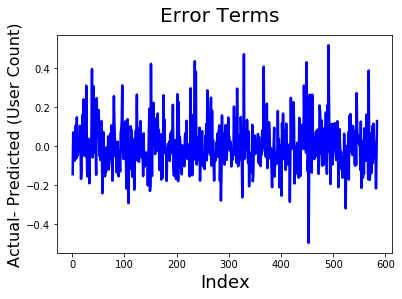

In [46]:
# Error terms on the testing dataset
x_range = [i for i in range(1,len(y_pred)+1)]
fig = plt.figure()
plt.plot(x_range,y_pred - y_test.reshape(-1), color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)               
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('Actual- Predicted (User Count)', fontsize=16)